# Multiple Linear Regression

With simple linear regression, we had
$$\hat{y} = b_0 + b_1x_1$$

With multiple linear regression, we extend simple linear regression using both quantitative and categorical explanatory ($x$) variables to predict a quantitative response.

$$\hat{y} = b_0 + b_1x_1 + b_2x_2 + \dots + b_mx_m$$

### [MLR Assumptions](https://online.stat.psu.edu/stat462/node/145/)

The four conditions ("*LINE*") that comprise the multiple linear regression model generalize the simple linear regression model conditions to take account that we now have multiple predictors.

* The mean of the response, $\mathrm{E}(Y_i)$, at each set of predictors, $\mathbf{x}_i = (x_{1i}, x_{2i}, \dots)$, is a **linear function** of the predictors.
    * An equivalent way to think of this condition is that the mean of the error, $\mathrm{E}(\varepsilon_i)$, at each set of values of the predictors, $\mathbf{x}_i = (x_{1i}, x_{2i}, \dots)$, is **zero**.
* The errors, $\varepsilon_i$, are **independent**.
* The errors, $\varepsilon_i$, at each set of values of the predictors, $\mathbf{x}_i = (x_{1i}, x_{2i}, \dots)$, are **normally distributed**.
* The errors, $\varepsilon_i$, at each set of values of the predictors, $\mathbf{x}_i = (x_{1i}, x_{2i}, \dots)$, have **equal variance**.

An alternative way to describe all four assumptions is that the errors, $\epsilon_i$, are independent normal random variables with mean zero and constant variance, $\sigma^2$.

As in simple linear regression, we can assess whether these conditions seem to hold for a multiple linear regression model applied to a particular sample dataset by looking at the estimated errors, i.e., the residuals, $e_i = y_i - \hat{y}_i$.

##### What can go wrong?

The four conditions of the model tells us what can go wrong with our model, namely:

* The population regression function is **not linear**. That is, the response $Y_i$ is not a function of linear trend ($\beta_0+\beta_1x_i$) plus some error, $\varepsilon_i$.
* The error terms are **not independent** (i.e., [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) of errors).
* The error terms are **not normally distributed**.
* The error terms do **not have equal variance** (i.e., [heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) of errors).

Sometimes, these errors can arise due to outliers, [Leverage Points](https://online.stat.psu.edu/stat462/node/170/), or multicollinearity of our predictor variables.

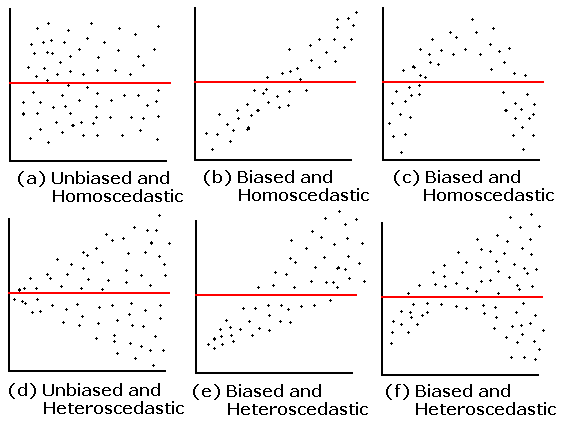

### Example 1 - House Prices

See Example 1 in [multiple-regression.ipynb](Examples\Regression\multiple-regression.ipynb) for an multiple linear regression example using statsmodels.

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./Data/house_prices.csv')

# Add intercept column
df['intercept'] = 1

df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


### Computing the Solution to Multiple Linear Regression

Credit: [Criteria for Estimates](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf)

Our *estimates* f the population parameters are referred to as $\hat{\boldsymbol{\beta}}$. Recall that the criteria we use for obtaining our estimates is to find the estimator $\hat{\beta}$ that minimizes the sum of squared residuals ($\sum{e_i^2}$ in scalar notation).

The vector of residuals $e$ is given by:
$$\mathbf{e} = \mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}$$

The sum of squared residuals (RSS) is $\mathbf{e}^Te$.
$$\begin{bmatrix}e_1&e_2&\dots&\dots&e_n\end{bmatrix}_{1\times n}\begin{bmatrix}e_1\\ e_2\\\vdots\\\vdots\\ e_n\end{bmatrix}_{n\times1} = \begin{bmatrix}e_1\times e_1 + e_2\times e_2 + \dots + e_n\times e_n\end{bmatrix}_{1\times1}$$

Thus, we can write
$$
\begin{equation}
    \begin{aligned}
        e^Te\;=&\;(\mathbf{y}-\mathbf{X}\hat{\boldsymbol{\beta}})^T(\mathbf{y}-\mathbf{X}\hat{\boldsymbol{\beta}}) \\
        =&\;\mathbf{y}^T\mathbf{y}-\hat{\boldsymbol{\beta}}^T\mathbf{X}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}\hat{\boldsymbol{\beta}}+\hat{\boldsymbol{\beta}}^T\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}}\\
        =&\;\mathbf{y}^T\mathbf{y} - 2\hat{\boldsymbol{\beta}}^T\mathbf{X}^T\mathbf{y}+\hat{\boldsymbol{\beta}}^T\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}}
    \end{aligned}
\end{equation}
$$

where we use the fact that the transpose of a scalar is the scalar, i.e., $\mathbf{y}^T\mathbf{X}\hat{\boldsymbol{\beta}}=(\mathbf{y}^T\mathbf{X}\hat{\boldsymbol{\beta}})^T=\hat{\boldsymbol{\beta}}^T\mathbf{X}^T\mathbf{y}$.

To find the $\hat{\boldsymbol{\beta}}$ that minimizes the RSS, we take the derivative of our previous equation with respect to $\hat{\boldsymbol{\beta}}$ and set it equal to 0.
$$\frac{\partial \mathbf{e}^T\mathbf{e}}{\partial\hat{\boldsymbol{\beta}}} = -2\mathbf{X}^T\mathbf{y}+\hat{\boldsymbol{\beta}}^T\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}}=0$$

To check that this is a minimum, we would take the derivative with respect to $\hat{\boldsymbol{\beta}}$ again, which gives us $2\mathbf{X}^T\mathbf{X}$. As long as $\mathbf{X}$ has full rank, this is a positive definite matrix (analogous to a positive real number) and hence a minimum.

From the above equation, we get the *normal equation*.
$$(\mathbf{X}^T\mathbf{X})\hat{\boldsymbol{\beta}}=\mathbf{X}^T\mathbf{y}$$

First, we should note $(\mathbf{X}^T\mathbf{X})$ is always square, e.g., $k\times k$. Second, it is always symmetric.

Recall that $(\mathbf{X}^T\mathbf{X})$ and $\mathbf{X}^T\mathbf{y}$ are known from our data but $\hat{\boldsymbol{\beta}}$ is unknown. If the inverse, $(\mathbf{X}^T\mathbf{X})^{-1}$, exists, then we have
$$
(\mathbf{X}^T\mathbf{X})^{-1}(\mathbf{X}^T\mathbf{X})\hat{\boldsymbol{\beta}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

where, by definition, $(\mathbf{X}^T\mathbf{X})^{-1}(\mathbf{X}^T\mathbf{X})\hat{\boldsymbol{\beta}}=\mathbf{I}$ is a $k\times k$ identity matrix.

This gives us
$$
\begin{aligned}
    \mathbf{I}\hat{\boldsymbol{\beta}}&\; =& (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
    \hat{\boldsymbol{\beta}}&\; =& (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{aligned}
$$

Since the estimators in the $\hat{\boldsymbol{\beta}}$ vector are a linear combination of random variables, they themselves are random variables.

##### Computing the Coefficient Using the Closed Form Solution

Now that we now $\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$, let's try to compute the estimators (or coefficients) ourself.

In [11]:
X = df[['intercept', 'bathrooms', 'bedrooms', 'area']]
y = df['price']

# Compute closed form solution
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
beta

array([10072.10704671,  7345.3917137 , -2925.80632467,   345.91101884])

##### Understanding our Results

Each coefficient can be understood as the predicted increase or decrease in the response variable for every one unit increase in the explanatory variable, holding all other variables in the model constant.

### Adding Categorical Variables

##### 0,1 Coding Scheme

The way we add categorical variables into our multiple linear regression model is by using dummy variables. The most common way dummy variables are added is through $1,0$ encoding. In this method, you create a new column for each category of the categorical variable with the value being $1$ or $0$ depending on whether the value was present in the original column.

 To ensure we can invert our matrix, we must keep our columns independent making our matrix [full rank](https://www.cds.caltech.edu/~murray/courses/cds101/fa02/faq/02-10-28_fullrank.html). When do this dummy variables by always dropping one of the columns given that we can infer it if we have each of the other columns and would create collinear columns in our matrix.
 
 For instance, if a particular value has not been present in the previous $k-1$ categories, then it will be present in the $k\text{th}$ category. The column you drop is called the **baseline**. The coefficients obtained from the output of a multiple linear regression model are then an indication of how the encoded categories compare to the baseline category.

| Neighborhood |
| --- |
| A |
| B |
| C |
| B |
| A |
| A |
| A |
| C |

would become

| A | B |
| --- | --- |
| 1 | 0 |
| 0 | 1 |
| 0 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |

##### Example 2 - Dummy Variables

See Example 2 in [multiple-regression.ipynb](Examples\Regression\multiple-regression.ipynb) for an multiple linear regression example using dummy variables and statsmodels.

##### -1,0,1 Coding Scheme

In some software (e.g. SAS), a -1,0,1-coding scheme is used in lieu of a 0,1-coding scheme. In the 0,1-coding scheme, comparisons are made to the baseline category (the one left out). In the -1,0,1-coding scheme, comparisons are made to the overall average.

In order to predict the baseline category in the 1,0 coding, ou use the intercept. In the 1,0,-1 coding scheme, you need to multiple each categorical coefficient by -1 to get the missing category.

### [Assessing the Model Assumptions](https://online.stat.psu.edu/stat462/node/146/)

We can use the same types of test as in the case of [simple linear regression](11.A.%20Simple%20Linear%20Regression.ipynb). Other tests include:

* [Test for Error Normality](https://online.stat.psu.edu/stat462/node/147/)
* [Tests for Constant Error Variance](https://online.stat.psu.edu/stat462/node/148/)
* Tests for Correlated Errors
    * [Durbin-Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)
    * [ARIMA or ARMA](http://www.statsref.com/HTML/index.html?arima.html)
    * Bivariate Plots or [Variance Inflation Factors](https://en.wikipedia.org/wiki/Variance_inflation_factor) (VIFs)
        * See [Example 4](Examples\Regression\multiple-regression.ipynb) for a [VIF example](https://etav.github.io/python/vif_factor_python.html).

##### Multicollinearity

When building a multiple linear regression model, we want our x-variables (explanatory/predictor) variables to be related to the response but not to one another. When our x-variables are correlated with one another, this is known as **multicollinearity**. Multicollinearity has two potential negative impacts.

* The expected relationships between the explanatory and response variables do not hold
    * For instance, you expect a positive relationship between an explanatory variable and the response (based on the bivariate relationships), but in the multiple linear regression case, the relationship is negative.
* Our hypothesis testing is not reliable.
    * Having correlated explanatory variables means that our coefficient estimates are less stable - the standard deviations (or standard errors) associated with the coefficients are large. Therefore, an association for particular variable that might be useful for predicting a response is no longer seen.

We can identify multicollinearity a couple of ways.

* Look at the correlation of each explanatory variable with all the other explanatory variables.
    * Scatter plot
    * Correlation coefficients differences from the bivariate relationships
* Look at the VIFs for each variable.
    * VIFs greater than 10 suggest multicollinearity. (Some experts suggest dropping that value even to 5.)

The most common way of working with correlated explanatory variables is simply to remove one of the variables that is most related to the other variables and of least interest to your model.

##### Variance Inflation Factor Computation
$$VIF_i = \frac{1}{1-R_i^2}$$

In the event our x-variables are correlated, then we should be able to predict its value based on the remaining x-variables in our model.

$$x_i = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n$$

All other x-variables - excluding $x_i$ - are then used to make predict then compute $R_i^2$, where $R_i^2$ is higher when $x_i$ is correlated with other variables (just as in the case with simple linear regression between $x$ and $y$).

Therefore, as $R_i^2$ increases our denominator decreases which, in turn, increases $VIF_i$.

### Higher Order Terms

When running MLR, it is possible to use higher order terms, such as $x_1x_2$, $x^2$, $x^3$, $x^4$, etc.

It is generally recommended to avoid using these terms in favor of the explanability of our simpler terms, e..g., slope of the sum of square footage of a home, unless we have good reason for their inclusion. This is primarily due to the fact that these terms become more difficult to interpret when the higher order terms show up.

If we do end up adding higher order terms to our model, we should be sure to include the lower order terms as well (e.g., $x_1$ if $x_1x_2$ or $x_1^2$ is included).

##### How to Identify Higher Order Terms? Quadratic & Cubic Terms

Higher order terms in linear models are created when multiplying two or more x-variables by one another. Common higher order terms include quadratics (e.g., $x_i^2$), cubics (e.g., $x_i^3$), or interactions (e.g., two or more x-variables are multiplied by each other, $x_1x_2$).

Previously, we had
$${\hat{y} = b_0 + b_1x_1 + b_2x_2.}$$

If we decide the linear model can be improved with higher order terms, the equation might change to
$${\hat{y} = b_0 + b_1x_1 + b_2x_1^2 + b_3x_2 + b_4x_1x_2.}$$

When creating models with *quadratic*, *cubic*, or even higher orders of a variable, we are essentially looking at how many curves there are in the relationships between the explanatory and response variables.

If there is one curve, like in a quadratic plot. Then we will want to add a quadratic term, as clearly a line won't be the best fit for this relationship.

<div align="center"><img src="./Images/quadraticlinearregression.png" width="600"/></div>

If there are two curves, then we may consider a cubic relationship.

<div align="center"><img src="./Images/cubiclinearregression.jpg" width="600"/></div>

##### How to Identify Higher Order Terms? Interaction Terms

We add interaction terms, e.g., $x_1x_2$, when the way that an explanatory variable, e.g., $x_1$, is related to your response variable is dependent on the value of another explanatory variable, e.g., $x_2$.

Using price, area, and neighborhood as an example, we may find that the slope of a line of best fit for the prices maintains the same slope for two different neighborhoods, though the price differs by a (roughly) constant amount for each. In the event this is true, we do *not* need an interaction term.

Here, $b_1$ is the way we estimate the relationship between *area* and *price*, which is the model we believe to be the same regardless of the neighborhood. Then, $b_2$ is the difference in price depending on which neighborhood you are in, which is the vertical distance between the two lines.

<div align="center"><img src="./Images/higher-order-no-interaction-term.png" width="600"></div>

From this we can see that
* The way that *area* is related to *price* is the same regardless of the *neighborhood* (i.e., same slope for both lines).
* The difference in *price* for different *neighborhoods* is the same regardless of the *area*.

When both of the above are true, we do not need an interaction term. However, if we find the way that *area* is related to *price* is different depending on the *neighborhood*, then we need an interaction term.

By adding the interaction, we allow the slopes of line for each neighborhood to be different. These lines might even cross or grow apart quickly. Either of these would suggest an interaction is present between *area* and *neighborhood* in the way they relate to the *price*.

<div align="center"><img src="./Images/higher-order-interaction-term.png" width="600"></div>